In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

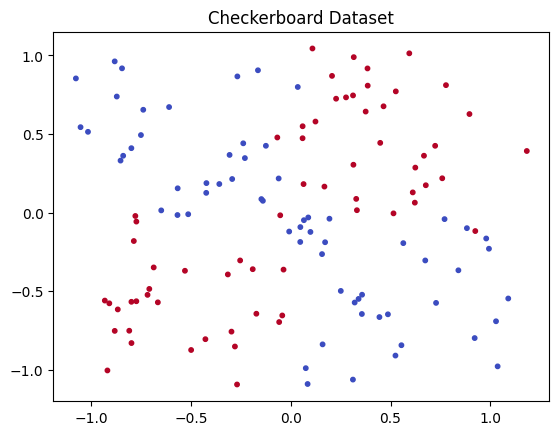

In [4]:
#checkerboard

# Generate checkerboard data
def create_checkerboard(n_samples=128, noise=0.1):
    np.random.seed(0)
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    z = (((x > 0) & (y > 0)) | ((x < 0) & (y < 0))).astype(int)
    # Adding noise
    x += noise * np.random.randn(n_samples)
    y += noise * np.random.randn(n_samples)
    return np.c_[x, y], z

# Generate the dataset
X, y = create_checkerboard()

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.title('Checkerboard Dataset')
plt.show()

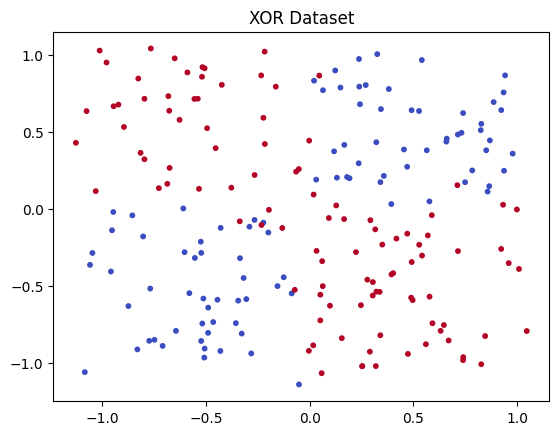

In [7]:
# Generate XOR data
def create_xor(n_samples=200, noise=0.1):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 2 - 1
    y = ((X[:, 0] > 0) != (X[:, 1] > 0)).astype(int)
    # Adding noise
    X += noise * np.random.randn(n_samples, 2)
    return X, y

# Generate the dataset
X, y = create_xor()

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.title('XOR Dataset')
plt.show()

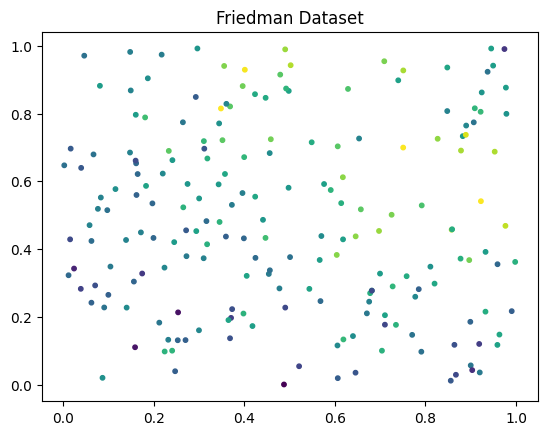

In [9]:
from sklearn.datasets import make_friedman1
import matplotlib.pyplot as plt

# Generate Friedman dataset
X, y = make_friedman1(n_samples=200, n_features=5, noise=0.1, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title('Friedman Dataset')
plt.show()

array([17.20332207, 22.38311929, 19.56461349, 14.3782733 , 14.70040735,
       14.09074212, 11.72470994, 22.41439172,  9.41870035, 11.83638522,
       13.90220166, 10.32043395,  3.24123165, 20.23989218, 24.35122544,
        6.84028318, 17.63953042, 17.79497162, 17.56325516, 16.24537996,
       17.46290348, 15.92103354, 16.98295849, 21.30893175, 21.73931994,
        9.2001228 , 15.79649889, 18.03204048, 21.54656875, 17.76431478,
       13.02435488, 12.77019664, 22.86579967,  8.78207151,  6.98314332,
       13.35264239, 10.32395058, 17.57263879, 17.80026177,  7.43249604,
        8.57232109, 11.31984494,  9.34710507, 17.20570515, 19.76338299,
       23.64837786,  3.09534802, 10.45829933,  8.09372305, 12.53771677,
       22.02383586, 12.83315374, 17.99450525,  9.62259242, 15.6460616 ,
       15.74626111,  9.10608332, 12.53357091,  8.0420944 , 17.87869463,
       11.49538315, 12.48932649, 11.41220478, 15.44079593,  9.42721595,
       13.90014353, 19.13269783, 13.4719992 ,  6.75819332, 12.65

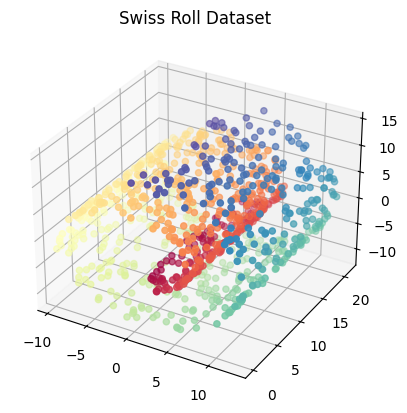

In [11]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Generate Swiss Roll dataset
X, y = make_swiss_roll(n_samples=1000, noise=0.1, random_state=0)

# Plot the data
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Spectral')
ax.set_title('Swiss Roll Dataset')
plt.show()

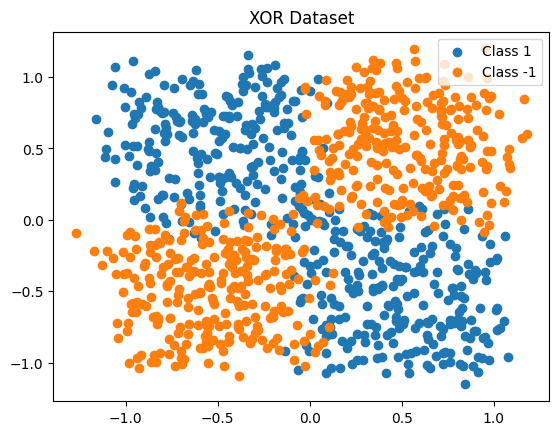

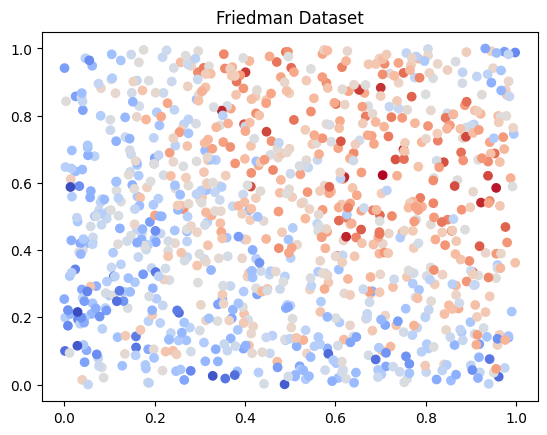

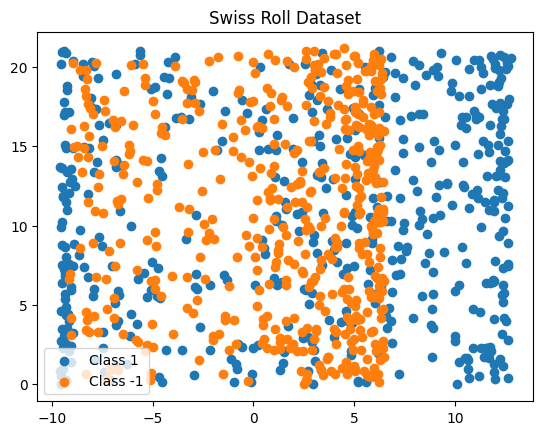

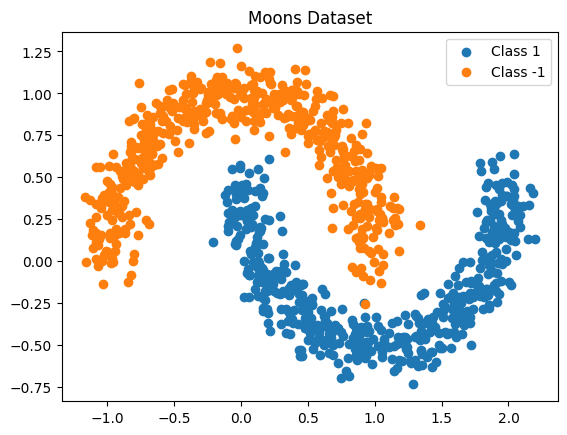

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1, make_swiss_roll, make_moons

# XOR Dataset
def create_xor(n_samples=1000, noise=0.1):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 2 - 1
    y = ((X[:, 0] > 0) != (X[:, 1] > 0)).astype(int)
    X += noise * np.random.randn(n_samples, 2)
    return X, y

# Generate XOR dataset
X_xor, y_xor = create_xor()
df_xor = pd.DataFrame(X_xor, columns=['Feature 1', 'Feature 2'])
df_xor['Label'] = y_xor
df_xor['Label'] = df_xor['Label'].replace({0: -1, 1: 1})

# Friedman Dataset
X_friedman, y_friedman = make_friedman1(n_samples=1000, n_features=5, noise=0.1, random_state=0)
df_friedman = pd.DataFrame(X_friedman, columns=[f'Feature {i+1}' for i in range(5)])
df_friedman['Label'] = y_friedman

# Swiss Roll Dataset
X_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise=0.1, random_state=0)
df_swiss = pd.DataFrame(X_swiss, columns=['Feature 1', 'Feature 2', 'Feature 3'])
median_label = np.median(y_swiss)
y_swiss_binary = (y_swiss > median_label).astype(int)
df_swiss['Label'] = y_swiss_binary
df_swiss['Label'] = df_swiss['Label'].replace({0: -1, 1: 1})

# Moons Dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Label'] = y_moons
df_moons['Label'] = df_moons['Label'].replace({0: -1, 1: 1})

# Plotting
def plot_data(X, y, title):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#1f77b4", label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color="#ff7f0e", label='Class -1')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot XOR
plot_data(X_xor, df_xor['Label'].values, 'XOR Dataset')

# Plot Friedman (first two features for visualization)
plt.scatter(X_friedman[:, 0], X_friedman[:, 1], c=df_friedman['Label'], cmap="coolwarm")
plt.title("Friedman Dataset")
plt.show()

# Plot Swiss Roll (first two features for visualization)
plot_data(X_swiss[:, :2], df_swiss['Label'].values, 'Swiss Roll Dataset')

# Plot Moons
plot_data(X_moons, df_moons['Label'].values, 'Moons Dataset')


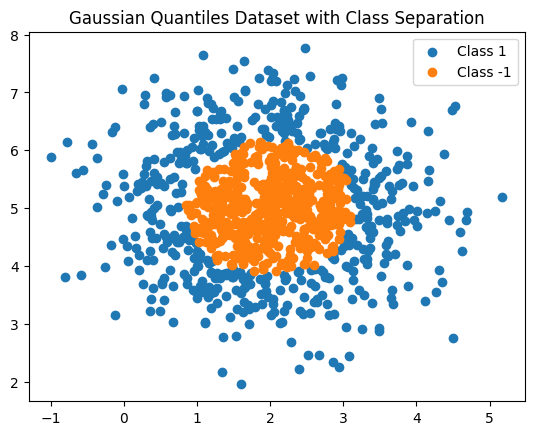

In [20]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate Gaussian Quantiles dataset with separation (adjusting mean for class separation)
X_gaussian, y_gaussian = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=2, random_state=0, mean=[2, 5])
y_gaussian = np.where(y_gaussian == 0, -1, 1)  # Replace 0 with -1 for binary labels

# Create DataFrame for Gaussian Quantiles
df_gaussian = pd.DataFrame(X_gaussian, columns=['Feature 1', 'Feature 2'])
df_gaussian['Label'] = y_gaussian

# Plotting function
def plot_data(X, y, title):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#1f77b4", label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color="#ff7f0e", label='Class -1')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Gaussian Quantiles dataset with gap between classes
plot_data(X_gaussian, df_gaussian['Label'].values, 'Gaussian Quantiles Dataset with Class Separation')


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_swiss_roll, make_gaussian_quantiles

# Create datasets
def create_xor(n_samples=1000, noise=0.1):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 2 - 1
    y = ((X[:, 0] > 0) != (X[:, 1] > 0)).astype(int)
    X += noise * np.random.randn(n_samples, 2)
    y = np.where(y == 0, -1, 1)  # Replace 0 with -1
    return X, y

# Function to generate datasets
def generate_dataset(dataset_name, n_samples=1000, noise=0.1):
    if dataset_name == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=0)
        y = np.where(y == 0, -1, 1)  # Replace 0 with -1
    elif dataset_name == 'xor':
        X, y = create_xor(n_samples, noise)
    elif dataset_name == 'swiss_roll':
        X, y = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=0)
        y = np.where(y > np.median(y), 1, -1)  # Binarize labels based on median
    elif dataset_name == 'gaussian':
        X, y = make_gaussian_quantiles(n_samples=n_samples, n_features=2, n_classes=2, random_state=0)
        y = np.where(y == 0, -1, 1)  # Replace 0 with -1
    else:
        raise ValueError("Dataset not supported. Choose from 'moons', 'xor', 'swiss_roll', 'gaussian'.")
    
    return pd.DataFrame(X, columns=[f'Feature {i+1}' for i in range(X.shape[1])]), pd.Series(y, name='Label')

# Function to plot and save high-resolution image
def plot_and_save(dataset_name, n_samples=1000, noise=0.1, save_path='plot.png'):
    df_features, df_labels = generate_dataset(dataset_name, n_samples, noise)
    
    X = df_features.values
    y = df_labels.values

    plt.figure(figsize=(10, 8))
    
    if X.shape[1] == 2:
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#1f77b4", label='Class 1')
        plt.scatter(X[y == -1, 0], X[y == -1, 1], color="#ff7f0e", label='Class -1')
    else:
        # For Swiss Roll or 3D data, plot only first two features for simplicity
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#1f77b4", label='Class 1')
        plt.scatter(X[y == -1, 0], X[y == -1, 1], color="#ff7f0e", label='Class -1')
    
    plt.title(f'{dataset_name.capitalize()} Dataset')
    plt.legend()
    plt.grid(True)
    
    # Save high-resolution plot
    plt.savefig(save_path, dpi=300)
    plt.close()
    
    return df_features, df_labels

# Example: Create and save plots for different datasets
datasets = ['moons', 'xor', 'swiss_roll', 'gaussian']
for dataset in datasets:
    plot_and_save(dataset_name=dataset, save_path=f'{dataset}_highres.png')

# Display one of the saved datasets
df_moons_features, df_moons_labels = plot_and_save('moons', save_path='moons_highres.png')



In [22]:
df_moons_features, df_moons_labels

(     Feature 1  Feature 2
 0     2.042715   0.518124
 1     1.720337  -0.132338
 2    -0.263867   0.763826
 3    -0.098035   0.180082
 4     0.478476  -0.398778
 ..         ...        ...
 995   1.548609  -0.135898
 996   0.312739   0.958280
 997   0.338237  -0.430999
 998   0.126943   0.099663
 999   0.542415  -0.474508
 
 [1000 rows x 2 columns],
 0      1
 1      1
 2     -1
 3      1
 4      1
       ..
 995    1
 996   -1
 997    1
 998    1
 999    1
 Name: Label, Length: 1000, dtype: int64)